# EDA Titanic

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 01. 데이터 수집 및 로드

In [193]:
df = pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 02. 데이터구조 및 변수 이해

In [194]:
print(df.shape) # 891행 12열
print(df.dtypes)
df.info()

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes:

## 03. 데이터 요약 및 기술통계

In [195]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [196]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [197]:
# 범주형 데이터 value_counts()
print(df.value_counts())

PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare     Cabin        Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599  71.2833  C85          C           1
4            1         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)         female  35.0  1      0      113803    53.1000  C123         S           1
7            0         1       McCarthy, Mr. Timothy J                              male    54.0  0      0      17463     51.8625  E46          S           1
11           1         3       Sandstrom, Miss. Marguerite Rut                      female  4.0   1      1      PP 9549   16.7000  G6           S           1
12           1         1       Bonnell, Miss. Elizabeth                             female  58.0  0      0      113783    26.5500  C103         S           1
                                                         

In [198]:
# 범주형 데이터 value_counts()
# print(df.value_counts('Pclass'))
print(df['Pclass'].value_counts())
print(df['Parch'].value_counts())
print(df['SibSp'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


## 04. 결측치, 이상치

In [199]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [200]:
df.duplicated('PassengerId').sum()

np.int64(0)

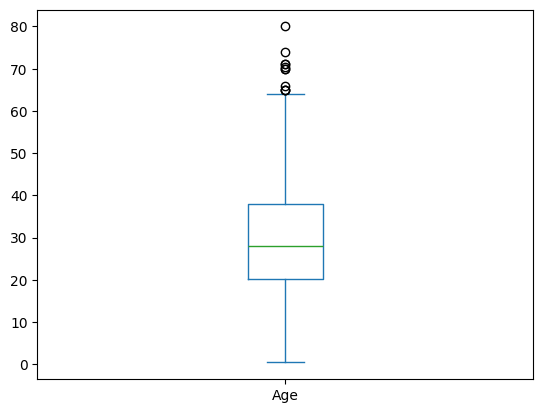

In [201]:
df['Age'].plot(kind='box')
plt.show()

# 05. 변수분포 시각화

In [202]:
sns.countplot(data=df, x='Sex', hue='Survived', hue='Sex')
plt.show()


SyntaxError: keyword argument repeated: hue (2169264957.py, line 1)

In [ ]:
sns.barplot(data=df, x="Sex", y='Survived', hue='Sex')

## 06. 변수간 관계 시각화

In [ ]:
# 나이, 요금간의 산포도
sns.scatterplot(df, x='Age', y='Fare')
plt.show()

In [ ]:
# pairplot으로 모든 수치형 데이터간 관계를 한번에 확인
sns.pairplot(df, hue='Survived')
plt.show()

## 07. 상관관계 및 교차분석
- 연속형 데이터 : 상관계수
- 범주형 데이터 : 교차표

In [ ]:
corr_mat = df.corr(numeric_only=True)
corr_mat

sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.show()

In [ ]:
# 교차표
pd.crosstab(df['Sex'], df['Survived'])

In [ ]:
# 두 변수간 생존율 교차분석
pivot_sex_pclass = df.pivot_table(
    index='Sex', columns='Pclass', values='Survived'
)

pivot_embarked_pclass = df.pivot_table(
    index='Embarked', columns='Pclass', values='Survived',
    aggfunc='mean'
)

display(pivot_sex_pclass)
display(pivot_embarked_pclass)

In [ ]:
# 히트맵
_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(pivot_sex_pclass, annot=True, fmt='.2f', ax=ax[0])

sns.heatmap(pivot_embarked_pclass, annot=True, fmt='.2f',\
            cmap='viridis')
plt.show()

## 08. 데이터 전처리
- 결측치/중복값/이상치 처리
- 불필요한 컬럼 제거

In [204]:
# 결측치처리
# 1. 기본값 또는 평균값 지정
# 2. 결측치 레코드 제거

df['Age'].info()

df['Age'] = df['Age'].fillna(df['Age'].mean())

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [ ]:
# 결측치가 많은 컬럼 제거
df['Cabin'].info()
df = df.drop('Cabin', axis=1)
df

In [ ]:
# 결측치 행 제거
df.dropna(subset=['Embarked']) # Embarked 열에 결측치가 있는 행만 제거
df.info()

### 09. Feature Engineering
Feature(독립변수, 속성, 열) 가공

- 새로운 변수 생성
- 그룹핑 처리
- 편향개선
- 스케일링 (범위변경)

### 문자형 -> 수치형
1. 범주형 -> 수치값
2. one-hot encoding 해당하는 값만 1이 되도록 변경

In [ ]:
!pip install scikit-learn -q

In [ ]:
# !pip install scitkit-learn -q

In [ ]:
# 범주형 데이터 -> 수치형 변경
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df.loc[:, 'Sex'] = encoder.fit_transform(df['Sex'])
print(encoder.classes_) # ['female' 'male'] 라벨 순서대로 0,1 변환
df.head()



In [ ]:
# one-hot encoding
# get_dummies : 범주형 컬럼을 0/1() 더미 컬럼들로 바꾸는 함수
df = pd.get_dummies(df, columns=['Embarked'], dtype=int)
df 

In [ ]:
# SibSp 형제자매/배우자수
# Parch 부모/자식수
df['Family'] = df['SibSp'] + df['Parch']
df.head()

In [205]:
# 나이 그룹 범주형으로 변환
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 10, 20, 30, 40, df['Age'].max()],
                        labels=range(5)).astype(int)

df['AgeGroup']

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    2
889    2
890    3
Name: AgeGroup, Length: 891, dtype: int64

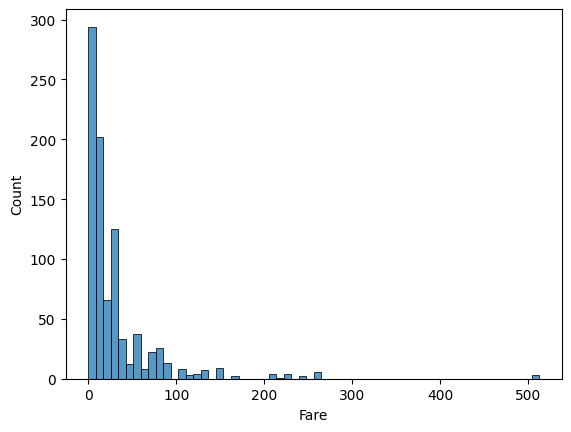

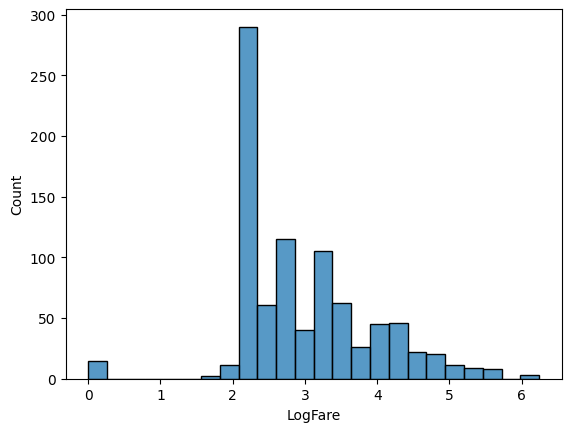

In [ ]:
# 로그 변환
# - 편향된 데이터를 고른 분포로 변환
# (평균/분산/편차 계산이 더 정확해진다.)

sns.histplot(data=df, x='Fare')

plt.show()

# np.log() -> log1p() 0에 가까운 값 처리에 유용
df['LogFare'] = df['Fare'].apply(lambda x: np.log1p(x))
sns.histplot(data=df, x='LogFare')
plt.show()

In [206]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeGroup
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.045450
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.046996
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.325710
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.936948
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.241797
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.171052
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.105505
AgeGroup,0.045450,-0.046996,-0.325710,0.936948,-0.241797,-0.171052,0.105505,1.000000


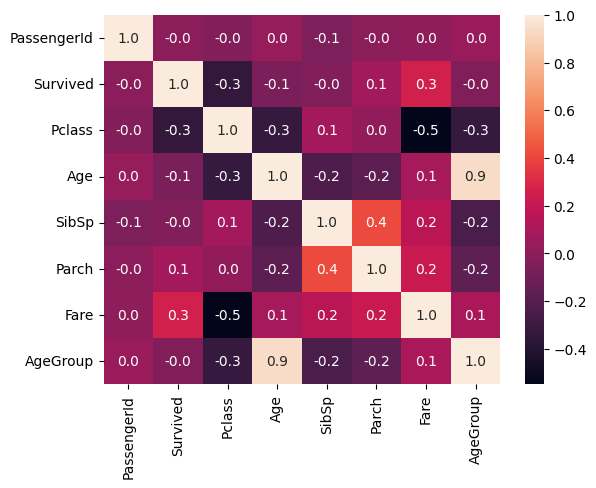

In [207]:
sns.heatmap(corr_mat, annot=True, fmt='.1f')
plt.show()

## 10. 최종요약/인사이트 도출